# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
import seaborn as sns
app_train.corr()['TARGET'].sort_values()

EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED_ANOM            -0.045987
                                 ...   
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, Length: 110, dtype: float64

In [6]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
employed_time = app_train[['TARGET', 'DAYS_EMPLOYED']].copy() # subset
employed_time.loc[:,'UNEMPLOYED_YEAR'] = abs(employed_time['DAYS_EMPLOYED']) / 365 # day-age to year-age

In [7]:
employed_time

,TARGET,DAYS_EMPLOYED,UNEMPLOYED_YEAR
0,1,-637.0,1.745205
1,0,-1188.0,3.254795
2,0,-225.0,0.616438
3,0,-3039.0,8.326027
4,0,-3038.0,8.323288
...,...,...,...
307506,0,-236.0,0.646575
307507,0,NaN,NaN
307508,0,-7921.0,21.701370
307509,1,-4786.0,13.112329


In [8]:
bins = 10
employed_time.loc[:,'UNEMPLOYED_YEAR_GRP'] = pd.qcut(employed_time['UNEMPLOYED_YEAR'], bins)
employed_time

,TARGET,DAYS_EMPLOYED,UNEMPLOYED_YEAR,UNEMPLOYED_YEAR_GRP
0,1,-637.0,1.745205,"(1.69, 2.518]"
1,0,-1188.0,3.254795,"(2.518, 3.425]"
2,0,-225.0,0.616438,"(-0.001, 0.912]"
3,0,-3039.0,8.326027,"(7.649, 10.071]"
4,0,-3038.0,8.323288,"(7.649, 10.071]"
...,...,...,...,...
307506,0,-236.0,0.646575,"(-0.001, 0.912]"
307507,0,NaN,NaN,NaN
307508,0,-7921.0,21.701370,"(14.611, 49.074]"
307509,1,-4786.0,13.112329,"(10.071, 14.611]"


In [9]:
employed_time.groupby('UNEMPLOYED_YEAR_GRP').describe()

TARGET                                               \
                       count      mean       std  min  25%  50%  75%  max   
UNEMPLOYED_YEAR_GRP                                                         
(-0.001, 0.912]      25235.0  0.110323  0.313298  0.0  0.0  0.0  0.0  1.0   
(0.912, 1.69]        25276.0  0.114536  0.318467  0.0  0.0  0.0  0.0  1.0   
(1.69, 2.518]        25159.0  0.110775  0.313860  0.0  0.0  0.0  0.0  1.0   
(2.518, 3.425]       25250.0  0.102614  0.303460  0.0  0.0  0.0  0.0  1.0   
(3.425, 4.515]       25204.0  0.096453  0.295217  0.0  0.0  0.0  0.0  1.0   
(4.515, 5.918]       25186.0  0.085325  0.279371  0.0  0.0  0.0  0.0  1.0   
(5.918, 7.649]       25206.0  0.074506  0.262598  0.0  0.0  0.0  0.0  1.0   
(7.649, 10.071]      25193.0  0.067638  0.251128  0.0  0.0  0.0  0.0  1.0   
(10.071, 14.611]     25217.0  0.058135  0.234004  0.0  0.0  0.0  0.0  1.0   
(14.611, 49.074]     25211.0  0.045615  0.208653  0.0  0.0  0.0  0.0  1.0   

                    DAYS_EMPLOYED               ...                  \
                            count         mean  ...     75%     max   
UNEMPLOYED_YEAR_GRP                             ...                   
(-0.001, 0.912]           25235.0  -204.789182  ...  -146.0     0.0   
(0.912, 1.69]             25276.0  -471.907106  ...  -400.0  -334.0   
(1.69, 2.518]             25159.0  -768.543225  ...  -696.0  -618.0   
(2.518, 3.425]            25250.0 -1081.058455  ...  -998.0  -920.0   
(3.425, 4.515]            25204.0 -1445.370616  ... -1342.0 -1251.0   
(4.515, 5.918]            25186.0 -1883.230168  ... -1753.0 -1649.0   
(5.918, 7.649]            25206.0 -2466.914227  ... -2308.0 -2161.0   
(7.649, 10.071]           25193.0 -3199.396221  ... -2985.0 -2793.0   
(10.071, 14.611]          25217.0 -4416.843875  ... -3989.0 -3676.0   
(14.611, 49.074]          25211.0 -7908.685891  ... -6110.0 -5334.0   

                    UNEMPLOYED_YEAR                                  \
                              count       mean       std        min   
UNEMPLOYED_YEAR_GRP                                                   
(-0.001, 0.912]             25235.0   0.561066  0.193574   0.000000   
(0.912, 1.69]               25276.0   1.292896  0.223645   0.915068   
(1.69, 2.518]               25159.0   2.105598  0.235911   1.693151   
(2.518, 3.425]              25250.0   2.961804  0.261085   2.520548   
(3.425, 4.515]              25204.0   3.959919  0.318279   3.427397   
(4.515, 5.918]              25186.0   5.159535  0.405039   4.517808   
(5.918, 7.649]              25206.0   6.758669  0.500291   5.920548   
(7.649, 10.071]             25193.0   8.765469  0.687983   7.652055   
(10.071, 14.611]            25217.0  12.100942  1.324240  10.071233   
(14.611, 49.074]            25211.0  21.667633  6.193137  14.613699   

                                                                 
                           25%        50%        75%        max  
UNEMPLOYED_YEAR_GRP                                              
(-0.001, 0.912]       0.400000   0.564384   0.715068   0.912329  
(0.912, 1.69]         1.095890   1.282192   1.487671   1.690411  
(1.69, 2.518]         1.906849   2.104110   2.306849   2.517808  
(2.518, 3.425]        2.734247   2.958904   3.189041   3.424658  
(3.425, 4.515]        3.676712   3.956164   4.238356   4.515068  
(4.515, 5.918]        4.802740   5.128767   5.504110   5.917808  
(5.918, 7.649]        6.323288   6.734247   7.189041   7.649315  
(7.649, 10.071]       8.178082   8.701370   9.345205  10.068493  
(10.071, 14.611]     10.928767  11.978082  13.183562  14.610959  
(14.611, 49.074]     16.739726  19.978082  25.016438  49.073973  

[10 rows x 24 columns]

C:\Users\Yi-Chang\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Yi-Chang\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yi-Chang\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


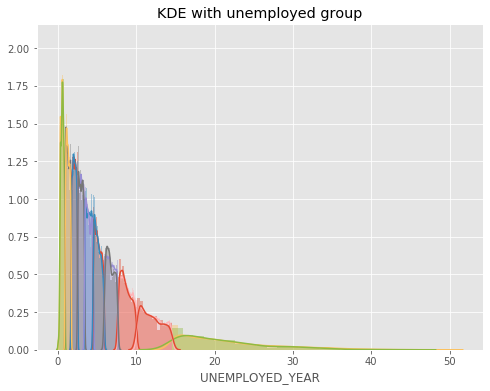

In [10]:
# 繪圖前先排序 / 分組
plt.style.use('ggplot')
employed_year_sorted = employed_time['UNEMPLOYED_YEAR_GRP'].unique()

plt.figure(figsize=(8,6))
for i in range(len(employed_year_sorted)):
    sns.distplot(employed_time.loc[(employed_time['UNEMPLOYED_YEAR_GRP'] == employed_year_sorted[i]) & \
                              (employed_time['TARGET'] == 0), 'UNEMPLOYED_YEAR'], label = str(employed_year_sorted[i]))
    
    sns.distplot(employed_time.loc[(employed_time['UNEMPLOYED_YEAR_GRP'] == employed_year_sorted[i]) & \
                              (employed_time['TARGET'] == 1), 'UNEMPLOYED_YEAR'], label = str(employed_year_sorted[i]))
plt.title('KDE with unemployed group')
plt.show()

In [12]:
plt.figure(figsize = (8, 8))
# draw a barplot group by unemployed 
"""
Your Code Here
"""
sns.barplot(x="UNEMPLOYED_YEAR", y="TARGET", data= employed_time)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Unemployed Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Unemployed Group');

KeyboardInterrupt: 

<Figure size 576x576 with 0 Axes>